# RNNs: How To Implement A Basic RNN

### Read In, Clean, And Split The Data

In [1]:
# Read in data and split into training and test set
# NOTE: we are NOT cleaning the data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

messages = pd.read_csv('../../../data/spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
labels = np.where(messages['label']=='spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(messages['text'],
                                                    labels, test_size=0.2)

### Prep Data For Modeling

In [12]:
# Import the tools we will need from keras # cleans/tokenizes data
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)    # clean/tokenize texts
# hello -> 3
# goodbye -> 4
# maps the words to an index

In [15]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)   # converts text to list of ints (index of words)
X_test_seq = tokenizer.texts_to_sequences(X_test)     # converts text to list of ints (index of words)

In [16]:
# What do these sequences look like?
X_train_seq[0]

[715, 1, 272, 39, 166, 19, 633, 1142, 26, 156, 3, 21, 234, 52, 154, 1, 3818, 3]

In [17]:
# Pad the sequences so each sequence is the same length
# ML models expect the same length for each feature
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [18]:
# What do these padded sequences look like?
X_train_seq_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  715,
          1,  272,   39,  166,   19,  633, 1142,   26,  156,    3,   21,
        234,   52,  154,    1, 3818,    3], dtype=int32)

### Build Model

In [19]:
# Import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [20]:
# Construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))  # input layer and create embedding (vector representation - w2vec or d2vec)
model.add(LSTM(32, dropout=0, recurrent_dropout=0))  # type of RNN -> tell it the dimension of the output space
# dropout is a form of regularization (to prevent overfitting)
model.add(Dense(32, activation='relu'))           # fully-connected neural network layer
# relu is a type of activation function
model.add(Dense(1, activation='sigmoid'))         # condense everything into a prediction of spam or ham
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          253952    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 263,361
Trainable params: 263,361
Non-trainable params: 0
_________________________________________________________________


2024-02-26 19:32:43.347267: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-26 19:32:43.349831: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-26 19:32:43.350229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [22]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10


2024-02-26 19:35:09.254530: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-26 19:35:09.767563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-26 19:35:09.768214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-26 19:35:09.768757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

138/140 [============================>.] - ETA: 0s - loss: 0.2929 - accuracy: 0.9096 - precision_m: 0.4558 - recall_m: 0.3789

2024-02-26 19:35:11.609310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-26 19:35:11.609958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-26 19:35:11.610425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

140/140 [==============================] - 3s 10ms/step - loss: 0.2912 - accuracy: 0.9100 - precision_m: 0.4541 - recall_m: 0.3806 - val_loss: 0.0714 - val_accuracy: 0.9803 - val_precision_m: 0.9198 - val_recall_m: 0.8919
Epoch 2/10
140/140 [==============================] - 3s 22ms/step - loss: 0.0379 - accuracy: 0.9897 - precision_m: 0.9602 - recall_m: 0.9263 - val_loss: 0.0505 - val_accuracy: 0.9857 - val_precision_m: 0.9595 - val_recall_m: 0.8878
Epoch 3/10
140/140 [==============================] - 4s 30ms/step - loss: 0.0142 - accuracy: 0.9955 - precision_m: 0.9849 - recall_m: 0.9657 - val_loss: 0.0702 - val_accuracy: 0.9857 - val_precision_m: 0.9714 - val_recall_m: 0.8718
Epoch 4/10
140/140 [==============================] - 4s 25ms/step - loss: 0.0046 - accuracy: 0.9991 - precision_m: 0.9914 - recall_m: 0.9888 - val_loss: 0.0661 - val_accuracy: 0.9865 - val_precision_m: 0.9667 - val_recall_m: 0.8926
Epoch 5/10
140/140 [==============================] - 3s 18ms/step - loss: 0.00

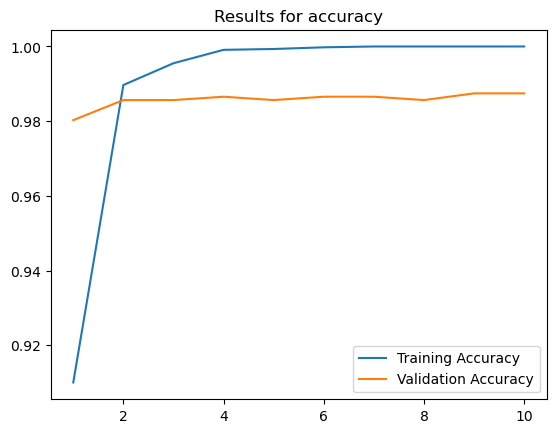

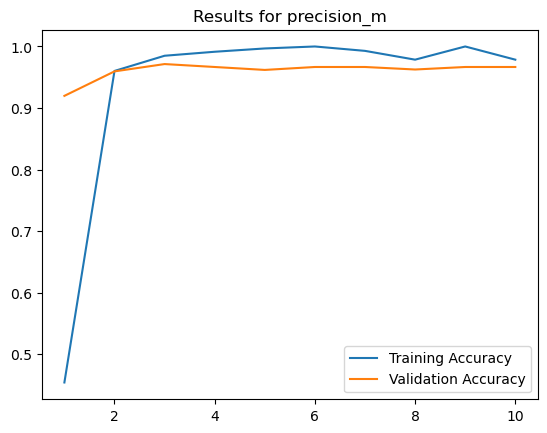

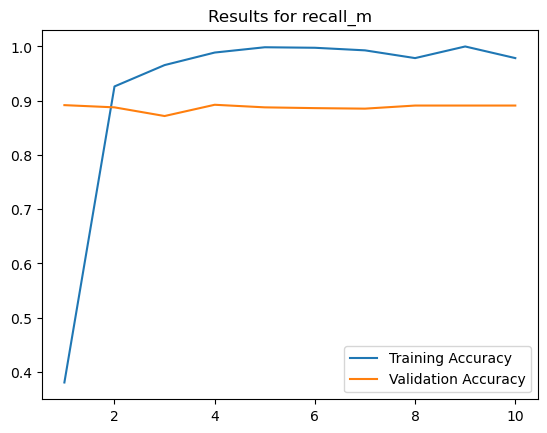

In [24]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()